---



# <font color='#ECA702'>**Análisis Multimodal de Síntomas en la Enfermedad de Parkinson**</font>

In [2]:
#@title **Importar librerías**

# Manipulación de datos
import os
import cv2
import numpy as np
import librosa
import pandas as pd

# Pytorch essentials
import torch

# Utils
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg

#Para Análisis de componentes principales
from sklearn.decomposition import PCA

In [3]:
#@title **Cargamos los datos desde Drive**



from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/data_parkinson')
print(os.getcwd())

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1XRruCPRodR4OhRCRZYKsyODqa_GuBkfC/data_parkinson


# <font color='#81d4fa'> **Reducción de la dimensionalidad**</font>

<p align='justify'>La reducción de dimensionalidad es una técnica en el análisis de datos y la inteligencia artificial que se utiliza para reducir el número de variables o características en un conjunto de datos, de tal forma que se pierda la mínima cantidad de información relevante. De este modo, manteniendo la mayor cantidad de características que expliquen la mayor cantidad de los datos, como sea posible. Es decir, por ejemplo, si se quisiera detectar un animal en una imagen, no todos los pixeles serían de ayuda en este proceso. Mientras que los pixeles que contienen la forma del animal poseen la mayor cantidad de información que permite exponer y explicar si una imagen contiene un animal o no, otros pixeles no ayudarían mucho a esta tarea; como, por ejemplo, aquellos pixeles que revelan información sobre el color y forma del fondo de la imagen. La reducción de dimensionalidad encara este problema y permite que estos pixeles que no brindan mucha información sobre aquello que se quiere detectar de una imagen sean ignorados, de tal forma que, posteriormente, se pueda entrenar un modelo de inteligencia artificial con un número menor de pixeles (Características) que si se utilizarán todos los pixeles (Características) de la imagen original, sin reducción</p>

<br>

## <font color='#01fe40'> **Principal Component Analysis (PCA)**</font>
<p align='justify'> El PCA o Análisis de Componentes principales es una técnica de reducción de dimensionalidad, cuyo objetivo es convertir un conjunto con innumerables variables, en un espacio con variables reducidas. Estas variables se les llaman componentes principales y son combinaciones lineales de las variables originales: Es decir, son halladas mediante ecuaciones matemáticas que involucran parejas de términos (Generalmente, una constante y un espacio vectorial o matriz) realizando una multiplicación entre sí; donde, estas parejas, son unidas mediante sumas.
<br> <br>
Ejemplo:

$$
\begin{aligned}
v = k_1v_1+k_2v_2+...+k_nv_n = \sum_{i=1}^{n}k_iv_i
\\
Donde\,k:\,Constante\;\&\;v:\,Espacio\,vectorial
\end{aligned}
$$

<br>

Este proceso será explicado en mayor detalle posteriormente.

</p>

<p align='justify'>El punto principal del PCA es encontrar las direcciones (Componentes principales) en la que los datos presentan una mayor varianza. Tras obtener estas direcciones, se ordenan de manera descendente, de tal forma que el primer componente principal capture la mayor cantidad de variabilidad en los datos, el segundo componente principal capture la mayor cantidad de variabilidad restante que dejó el primer componente principal, el tercer componente principal capture la mayor cantidad de variabilidad restante que dejaron el primer y segundo componente principal y así sucesivamente.</p>

<br>

### <font color='#b9ff66'> **Como realizar un Principal Component Analysis (PCA)**</font>


<p align='justify'>Para realizar el análisis de componentes se usará la librería "sklearn" en su módulo "descomposition" importando la clase "PCA". Debido a que esta clase realiza un PCA que hace uso del SVD (Singular value descomposition o Descomposición en Valores Singulares) así como estipula su página web:</p>

<blockquote cite="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html"> <em>Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.</em></blockquote>

<p align='justify'>Se explicará el proceso para realizar un análisis de componentes principales, haciendo uso de la descomposición en valores singulares.</p>

<br>

<p align='justify'>En principio, cabe resaltar que la base del PCA es poder encontrar grupos de valores que se reúnan entre ciertos rangos concretos, por lo que, se debe tener en cuenta, que las imágenes, al ser un conjunto de pixeles con determinados colores dispuestas en una matriz, pueden producir estos conjuntos de valores en una gráfica. A estos grupos de valores arrejuntados en un rango concreto se les llama “Clúster”.</p>

<p align='justify'>La representación de una imagen en un computador se compone de pixeles con colores en ciertos puntos del espacio de la pantalla. Los colores son un conjunto de capas (Haciendo uso del sistema RGB presente en la mayoría de los computadores, se encuentran 3 capas: Red, Green y Blue). Similar a una receta; donde se deben poner 100 gramos del ingrediente 1, 200 gramos del ingrediente 2 y una pizca del ingrediente 3, así mismo, un color (Como, por ejemplo, el naranja) consta de una poca cantidad de rojo, cierta cantidad de verde y un toque de azul. Por tanto, cuando un color se muestra en pantalla, lo que se hace es, descomponer ese color en sus componentes principales de rojo, verde y azul; tras esto, se coloca la cantidad de intensidad correspondiente de rojo, de verde y de azul que hay en ese color en una matriz de dimensiones (M x N x 3), en cada pixel se dispone la intensidad de rojo, verde y azul que indique la matriz y, finalmente, se superponen para producir el color final. Debido a que la “receta”, por así decirlo, del color naranja, posee la misma cantidad de rojo, de verde y de azul, cuando este color sea separado en sus 3 capas correspondientes (Red, green, blue o RGB), los valores de la intensidad del rojo, verde y azul sean dispuestos en una gráfica de 3 dimensiones, habrá grupos de puntos que se agruparan en cierta área de la gráfica.</p>

<center>
  <p align='justify'>Por ejemplo:</p>
</center>

<center>
  <p>Teniendo en cuenta la siguiente imágen:</p>
</center>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/bola%20morada.jpg" alt="Un círculo de color morado sobre fondo blanco">
</center>

<br><br>

<center>
  <p>Que posee los siguientes valores rgb para el color del círculo:</p>
</center>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/valores%20de%20morado%20de%20bola%20morada.png" alt="Valores RGB para el color morado del círculo de la imagen anterior">
</center>

<br><br>

<p align='justify'>Al separar sus capas RGB y graficar los valores en un gráfico de tres dimensiones, donde el eje X represente el canal rojo, el eje Y represente el canal verde y el eje Z represente el canal azul; se obtendría un conjunto de puntos agrupados en un clúster cerca de los valores RGB que componen la imagen; como se puede apreciar en el siguiente código:</p>


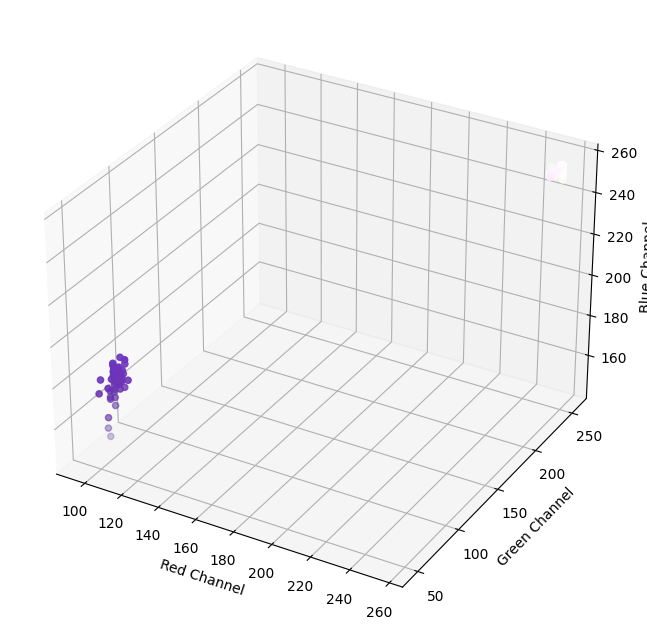

In [4]:
# @title
# Se lee la imágen
img = mpimg.imread('/content/drive/MyDrive/UIS/SEMESTRE 7/INTELIGENCIA ARTIFICIAL/PROYECTO FINAL/Proyecto_Final_IA1_UIS/notebooks/figures/bola morada.jpg')

# Se obtienen los canales RGB
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

np.random.seed(1010110)

"""
Se crea una figure para el gráfico 3D
y se añade un subplot cuya proyección será
en tres dimensiones, lo que permite realizar
el gráfico 3D
"""
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')




"""
Debido a que si tomamos todos los datos, sería mucha información
para que el computador la maneje, se toma una muestra de los valores
de intesnidad de los canales y se muestran como puntos
en el gráfico, donde el eje X representa el canal Rojo, el eje Y representa
el canal Verde y el eje Z representa el canal Azul.
Luego, se toman de manera aleatoría algunos de los índices de la matriz que
indican donde se encuentran los valores para, luego, usarlos para tomar samples
de la matriz original para cada uno de los canales
"""
indices = np.random.choice(np.arange(red_channel.size), size=1000, replace=False)



"""
Se aplana el array con numpy.ravel y, luego, de ese array aplanado, se toman
samples basados en el índice obtenido anteriormente
"""
x = red_channel.ravel()[indices]
y = green_channel.ravel()[indices]
z = blue_channel.ravel()[indices]




"""
Se grafican los valores dentro de cada uno de los array y se les pone el mismo
color de la imágen, a través de sobreponer todas las capas de la imagen,
luego, encontrar la transpuesta (Para cambiar el orden de BGR a RGB) y, finalmente
se normalizan dividiendo por 255
"""
ax.scatter(x, y, z, c=np.vstack((x, y, z)).T / 255.0, marker='o')



# Se etiquetan los ejes
ax.set_xlabel('Red Channel')
ax.set_ylabel('Green Channel')
ax.set_zlabel('Blue Channel')

# Se muestra la gráfica
plt.show()

<p align='justify'>
Y, basándose en este concepto es que se puede realizar un análisis de componentes principales.
</p>

#### <font color='#d3e62c'> **&nbsp;&nbsp;&nbsp;1. Separar la imágen en sus canales**</font>

<p align='justify'>Teniendo en cuenta lo mencionado anteriormente, el primer paso es separar el canal rojo, verde y azul de la imágen original, de tal forma que las matrices que contienen la cantidad de intensidad que tiene cada canal un un pixel determinado, sean accesibles.</p>

<br>

<center>
  <img src='https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/matrices%20de%20canales%20rgb.png' alt='Imagen de un conjunto de matrices que representan los canales RGB de una imagen cualquiera. Autor en las referencias'></img>
</center>

<br>

#### <font color='#d3e62c'> **&nbsp;&nbsp;&nbsp;2. Aplanar cada canal**</font>

<p align='justify'>Tras esto, se aplanan las matrices, de tal manera que resulten tranformadas en vectores unidmiensionales.</p>

<br>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/flattening%20image%20channels.png" alt="Canales de la imagen RGB separados en arreglos unidimensionales">
</center>

<br>

#### <font color='#d3e62c'> **&nbsp;&nbsp;&nbsp;3. Unificar los canales en una sola matriz**</font>

<p align='justify'>Posteriormente, estos arreglos se concatenan dentro de una sola matriz, de tal forma que las columnas de esa matriz sean cada uno de los canales RGB de la imágen y cada una de las filas los píxeles que tiene la matriz. De esta forma, al revisar una fila de la matriz, se puede saber que valores componen el color que, finalmente, muestra ese pixel en pantalla.</p>


<br>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/concat%20images%20channels.png" alt="Concatenación de los canales RGB en una sola matriz">
</center>

<br>


#### <font color='#d3e62c'> **&nbsp;&nbsp;&nbsp;4. Centrar los datos de la matriz**</font>

<p align='justify'>Desde este punto se usarán dos explicaciones en simultáneo: La algebraica (Que realiza los cambios respectivos en los datos) y la gráfica (Que permite comprender mejor para que se realizan las modificaciones). Por lo tanto, se graficarán las filas de la matriz como un punto en una gráfica de tres dimensiones, donde cada uno de los ejes representa un canal RGB de la imágen.</p>

<p align='justify'>Se inicia con la matriz original, graficando los puntos en un espacio tridimensional.</p>

<br>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/puntos%20en%203%20dimensiones.png" alt="Representación gráfica tridimensional de los canales RGB">
</center>

<br>

<p align='justify'>Posteriormente, cada punto se separa en sus componentes: (X, Y, Z) y para cada uno de los componentes se encuentra la media. Aquí sucede la primera transformación lineal. Primero, se encuentra la media para cada columna de la matriz</p>

<br>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/media%20de%20los%20datos.png" alt="Media de la dispersión de puntos que representa los canales RGB">
</center>

<br>

$$
\begin{gather*}
\mu_{i}=\frac{1}{N}\sum_{i=1}^{N}c_i \\
Donde\,\mu_i\,es\,la\,media\,de\,cada\,columna\;y\;c_{i}\,son\,los\,elementos\,de\,cada\,columna
\end{gather*}
$$

<br>

<p align='justify'>Esto se realizara para todas las columnas resultando así un punto en la gráfica que representa el centro de la distribución de puntos en la gráfica. Gráficamente, lo que se debe hacer es trasladar todos los puntos en igual cantidad, hasta que el punto central se alinée con el origen de la gráfica. (Esto para las 3 dimensiones)</p>

<p align='justify'>Esto, algebráicamente se representa con una transformación lineal:</p>

<br>

$$
\begin{gather*}
\forall\,i \leq N: A_{M\times i} = A_{M\times i} - \mu_{i}
\\
Donde\,\mu_{i}\,es\,la\,media\,de\,cada\,columna\;y\;A_{M\times i}\,es\,cada\,una\,de\,las\,columnas\,de\,la\,matriz
\end{gather*}
$$

<br>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/centrado%20de%20los%20datos.png" alt="Centrado de la matriz de canales RGB con respecto al origen">
</center>

<br>

<p align='justify'>Esto se debe realizar en todas las dimensiones. La representación gráfica sólo muestra dos dimensiones, debido a que es más fácil comprender este concepto usando sólo dos ejes. De todas formas, se debe recordar que esto se centra en todas las dimensiones.</p>

<p align='justify'>Finalmente, tras ser centrados, los puntos, en tres dimensiones, resultan de la siguiente manera.</p>

<br>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/puntos%20en%203%20dimensiones%20centrados.png" alt="Puntos en 3 dimensiones centrados">
</center>

<br>


#### <font color='#d3e62c'>**&nbsp;&nbsp;&nbsp;5. Calcular los eigenvalores**</font>

<p align='justify'>Los eigenvectores son vectores (Un segmento de recta compuesto de tres componentes, uno en cada uno de los ejes del plano cartesiano) que permiten entender que componente separa en mayor medida los clústeres de datos en una imagen.</p>


<p align='justify'>Pero, antes de analizar los eigenvectores, es mejor revisar como se construyen.
Un eigenvector se puede calcular, creando una recta de pendiente aleatoria, centrada en el origen (Debido a que los datos están centrados) y, rotándola de tal forma que la distancia que hay de los datos a la recta, cuando se proyecta un segmento de recta perpendicular a la recta centrada en el origen, sea el más pequeño posible.</p>

<p align='justify'>Se puede pensar como encontrar la recta de una regresión lineal o un ajuste lineal.</p>

<br>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/proyeccio%CC%81n%20de%20puntos%20en%20la%20linea%20de%20regresion%20lineal.png" alt="La recta de regresión lineal cortando los datos y mostrando la distancia de los datos hacia ella">
</center>


<br>


<p align='justify'>En la gráfica, la proyección paralela del punto sobre la recta se simboliza con un círculo de color naranja</p>


<p align='justify'>Tras encontrar la recta que corta los datos, minimizando la distancia de cada punto hacia su proyección en la recta, se encuentran las distancias desde el origen hacia cada una de las proyecciones.</p>

<br>



<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/eigenvalores.png" alt="Cálculo de los eigenvalores">
</center>

<br>



<p align='justify'>El promedio del cuadrado de las distancias de cada una de las proyecciones al punto de origen se llama "Eigenvalor".</p>



<p align='justify'>Con esto, se calculó el eigenvalor para el componente principal No. 1.</p>



<p align='justify'>Tras esto, se calcula el eigenvalor para el componente principal No. 2. Para realizar esto, se busca una recta que cumpla las mismas condiciones que la recta anterior, que se usó para calcular el eigenvalor del PC1 (Que la distancia entre la recta y los puntos dispersos sea la mínima), pero, además, esta debe ser perpendicular a la recta anterior. En el ejemplo siguiente, como está en dos dimensiones, la recta que cumple esto es, simplemente, la recta perpendicular a la anterior, pero, en tres dimensiones, esta podría rotar respecto a la recta para calcular los eigenvalores y eigenvectores del PC1.</p>


<br>


<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/eigenvalores%20PC2.png" alt="Recta para calcular los eigenvalores del PC2">
</center>

<br>



<p align='justify'>Finalmente, se debe mencionar que estos dos eigenvalores poseen una fórmula muy similar al de la varianza en estadística. Esto es porque los eigenvalores son una medida de la varianza de las distancias desde el origen proyectadas hacia cada uno de los componentes principales. Ahora, haciendo uso de estos dos eigenvalores, se puede calcular que tanto afecta cada uno a la varianza total de la muestra. Si, por ejemplo el eigenvalor del PC1 fuese igual a 8, mientras que el eigenvalor del PC2 es igual a 2, eso querría decir que la varianza total del conjunto de datos es igual a 10; por tanto, como el eigenvalor de PC1 es igual a 8, esto querría decir que el componente principal 1 (PC1) contribuye con un 80% de la varianza de los datos, mientras que el componente principal 2 (PC2) sólo contribuye con un 20%. Esto quiere decir que el PC1 separa en mayor medida los datos que PC2.</p>




<p align='justify'>En tres dimensiones, se cuenta con la facilidad de tener tres planos en los cuales poder calcular los eigenvalores (Plano XY, XZ y YZ), por tanto, se puede repetir el proceso de calcular los eigenvalores tres veces, permitiendo calcular cada una de las varianzas para cada una de las variables X, Y, Z. Finalmente, este sería el aspecto.</p>

<br>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/eigenvalores%20en%203d.png" alt="Rectas de eigenvalores y eigenvectores en 3d">
</center>

<br>


#### <font color='#d3e62c'>**&nbsp;&nbsp;&nbsp;5. Calcular los eigenvectores**</font>

<p align='justify'>Teniendo en cuenta las rectas que se mostraron en la imagen anterior, debido a su naturaleza, estas poseen una pendiente. Con esta pendiente, se puede calcular un vector que represente que tantas unidades se debe mover en un eje, para poder aumentar una unidad en otro eje.</p>


<p align='justify'>Por ejemplo, con una recta de pendiente igual a 8, quiere decir que por cada unidad recorrida en el eje horizontal, se ascienden 8 unidades en el eje vertical. Esta proporción entre la variación de un eje con otro es llamado una combinación lineal.</p>



<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/recta%20de%20pendiente%208.png" alt="Recta con pendiente igual a 8">
</center>


<p align='justify'>Haciendo uso de estos componentes se puede crear un vector que indica que tanto varia el conjunto de datos en un eje, comparado con el otro eje. Y, haciendo una simple operación, dividiendo cada uno de los componentes de este vector por la longitud del vector, se puede reescalar el vector para que tenga longitud igual a 1.</p>



<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/eigenvector%20de%20recta%20de%20pendiente%208.png" alt="Eigenvector para el ejemplo de la recta de pendiente 8">
</center>


<p align='justify'>Este vector se puede encontrar para todas las componentes (X, Y & Z) y es llamado Eigenvector. En tres dimensiones se observa de esta forma:</p>


<br>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/eigenvectores%20en%203%20dimensiones.png" alt="Eigenvectores en 3 dimensiones">
</center>

<br>


#### <font color='#d3e62c'>**&nbsp;&nbsp;&nbsp;6. Cambiar el sistema de referencia de los datos**</font>

<p align='justify'>Finalmente, se toman las proyecciones de los puntos sobre las rectas sobre las que se arman los eigenvectores y se rota, de tal forma, que las rectas de los eigenvectores se conviertan en el nuevo sistema de referencia para medir las disntacias entre los puntos.</p>





<br>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/singular%20value%20decomposition.png" alt="Singular Value Decomposition">
</center>

<br>

<p align='justify'>Finalmente, teniendo en cuenta que se puede calcular los eigenvectores y eigenvalores y que estos indican como y en que cantidad ciertas características separan los clústeres de pixeles de una imágen. Estas características se pueden ordenar de mayor a menor. Teniendo en cuenta esta "lista" de características o ejes o canales de imagen que separan en mayor medida los datos, las que poseen la mayor varianza (Mayores distancias desde el origen y, por tanto, mayor separación) se pueden mantener, mientras que las que poseen menor varianza, pueden descartarse en cierto pixel.</p>

#### <font color='#d3e62c'>**&nbsp;&nbsp;&nbsp;Nota**</font>



<p align='justify'>El proceso para hacer un análisis de componentes principales, también se puede realizar, enteramente, con álgebra lineal y calcular las distancias de los puntos originales con respecto a las rectas sobre las que se construyen los eigenvectores (Esto en base a la matriz de covarianza); por esto es que se menciona que estos eigenvectores y eigenvalores son producto de transformaciones lineales.</p>



<br>

<center>
  <img src="https://raw.githubusercontent.com/AndresFelipeMunozAguilar/Proyecto_Final_IA1_UIS/main/notebooks/figures/eigenvectores%20gracias%20a%20matrices.png" alt="Transformaciones lineales para calcular eigenvalores y eigenvectores">
</center>

<br>

# **El siguiente código permite iterar sobre distintos porcentajes para ver cual PCA es la mejor a usar**

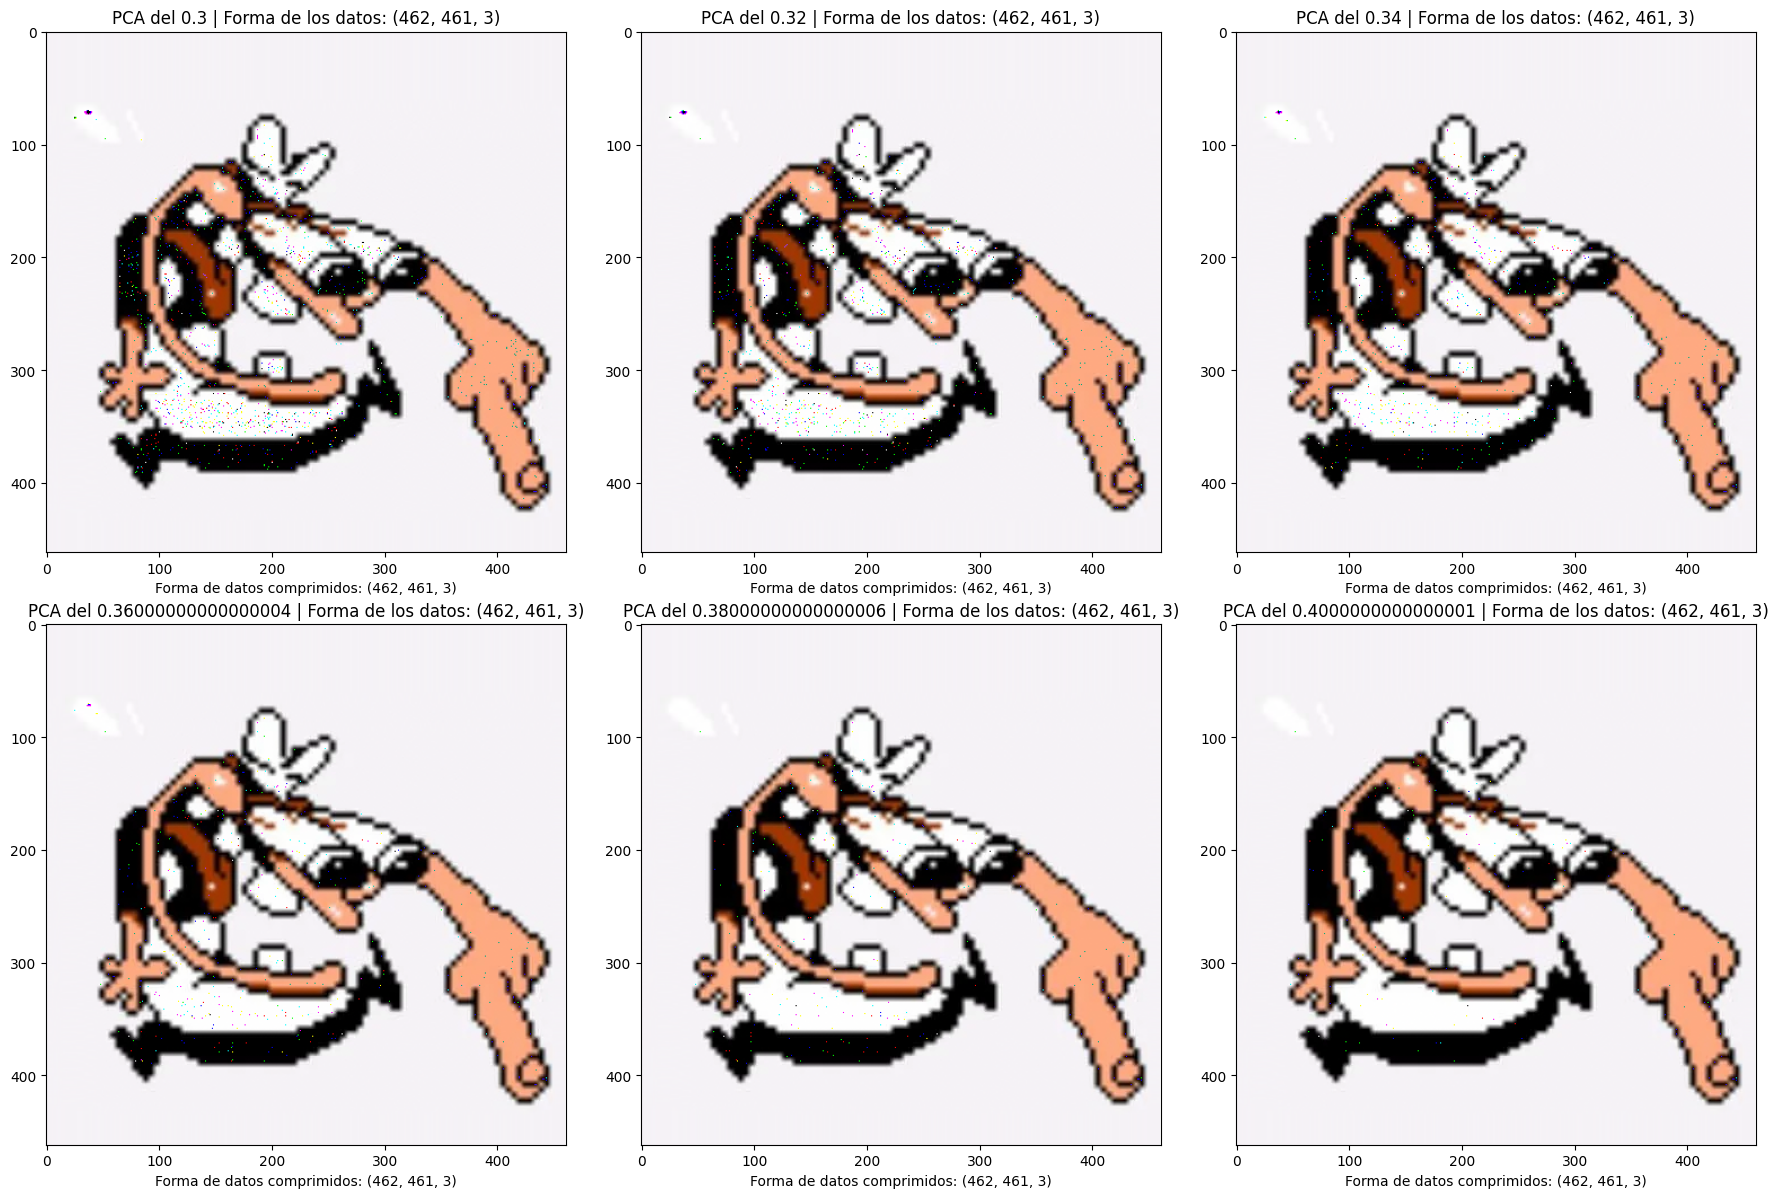

In [5]:
img = cv2.imread('/content/drive/MyDrive/UIS/SEMESTRE 7/INTELIGENCIA ARTIFICIAL/PROYECTO FINAL/Proyecto_Final_IA1_UIS/notebooks/figures/Sin título.png') #you can use any image you want.

# Splitting the image in R,G,B arrays.

blue, green, red = cv2.split(img)

porcentajeDePCA = np.arange(start = 0.3, stop = 0.41, step = 0.02)

i = 1

figure, axes = plt.subplots(2, 3, figsize=(18,12) )

for porcentaje in porcentajeDePCA:
  #initialize PCA with first 20 principal components
  pca = PCA( int( 461 * porcentaje ) )

  #Applying to red channel and then applying inverse transform to transformed array.
  red_transformed = pca.fit_transform(red)
  red_inverted = pca.inverse_transform(red_transformed)

  #Applying to Green channel and then applying inverse transform to transformed array.
  green_transformed = pca.fit_transform(green)
  green_inverted = pca.inverse_transform(green_transformed)

  #Applying to Blue channel and then applying inverse transform to transformed array.
  blue_transformed = pca.fit_transform(blue)
  blue_inverted = pca.inverse_transform(blue_transformed)



  img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)

  #


  plt.subplot( 2, 3, i )
  #viewing the compressed image
  plt.title( f'PCA del {porcentaje} | Forma de los datos: {img_compressed.shape}' )
  plt.xlabel( f'Forma de datos comprimidos: {img_compressed.shape}' )
  plt.imshow(img_compressed)

  i += 1

plt.tight_layout()
plt.show()

# **Análisis de Componentes Principales para la Disartria**

In [11]:
def graficarPCA_Grayscale( imagen, porcentaje):
  '''
    _________________________________________________________________________
 / \                                                                         \.
|   |                                                                        |.
 \_ |                                                                        |.
    |                                                                        |.

      Esta función lo que hace es tomar una imagen y un cierto porcentaje de
      reducción, al que se quiere reducir esta imagen. A esta imagen, le aplica
      PCA, con el porcentaje correspondiente, luego, la reconstruye para tener
      el mismo tamaño original y, finalmente, grafica dos imagenes: La imagen
      después del PCA y la imágen reconstruida después del PCA.
      Esto es sólo para imágenes en blanco y negro
    |                                                                        |.
    |                                                                        |.
    |                                                                        |.
    |   _____________________________________________________________________|___
    |  /                                                                        /.
    \_/________________________________________________________________________/.
  '''



  '''
  Primero, se crea una gráfica en cuadrícula, donde se graficarán
  dos resultados: La imagen, después de haberla procesado con PCA
  y que se hayan reducido sus columnas y, por otro lado, la imagen
  reconstruida después de aplicar PCA, cuyo tamaño será igual al
  de la imágen original, pero, su peso será menor, debido a que
  se redujo su dimensionalidad, por lo que cada pixel toma menos
  espacio en el disco
  '''
  figure, axes = plt.subplots( nrows=1, ncols=2, figsize=(18,12) )



  '''
  Debido a que el porcentaje es un número entre 0 y 100, se divide
  el porcentaje entre 100 para que las operaciones matemáticas siguientes,
  no den error
  '''
  porcentaje = porcentaje / 100




  '''
  Se instancia un objeto de la clase PCA. Debido a que la instancia del PCA
  toma como argumento la cantidad de componentes hasta los que se va a
  reducir la dimensionalidad (Es decir, si una imagen con 100 filas y
  100 columnas y se quiere reducir con PCA un 70%, el tamaño
  resultante será 100 filas X 70 columnas), se debe tomar la cantidad
  de columnas que tiene la imagen, multiplicarla por el porcentaje requerido
  y pasarlo como argumento para iniciar esta instancia de la clase PCA
  '''
  pca = PCA( int( imagen.shape[1] * porcentaje ) )



  '''
  Se usa la instancia para ajustar los datos a la dimensionalidad
  deseada
  '''
  imagen_transformed = pca.fit_transform( imagen )

  '''
  Luego, se invierte esta reducción, para devolver a la imágen
  a su tamaño original, pero, debido a que cada pixel tiene
  menos información, en consecuencia, la imágen pesa menos,
  a pesar de tener el mismo tamaño original
  '''
  imagen_inverted = pca.inverse_transform( imagen_transformed )

  '''
  Finalmente, se grafíca en la primera posición de la cuadrícula la imagen
  procesada con PCA, sin reconstrucción
  '''
  axes[0].set_title( f'Imágen transformada | Forma de los datos: {imagen_transformed.shape}' )
  axes[0].imshow(imagen_transformed.astype(np.uint8), cmap='gray')




  '''
  Y en la segunda posición de la cuadrícula, la imagen post procesamiento
  y post reconstrucción
  '''
  axes[1].set_title( f'Imágen final (PCA del {porcentaje*100}%) | Forma de los datos: {imagen_inverted.shape}' )
  axes[1].imshow(imagen_inverted, cmap='gray')



  plt.tight_layout()
  plt.show()

  #Finalmente, se retornan ambas imágenes graficadas
  return imagen_transformed, imagen_inverted

In [ ]:
def PCA_Grayscale( imagen, porcentaje):
  '''
    _________________________________________________________________________
 / \                                                                         \.
|   |                                                                        |.
 \_ |                                                                        |.
    |                                                                        |.

      Esta función lo que hace es tomar una imagen y un cierto porcentaje de
      reducción, al que se quiere reducir esta imagen. A esta imagen, le aplica
      PCA, con el porcentaje correspondiente, luego, la reconstruye para tener
      el mismo tamaño original y, finalmente, retorna dos imagenes: La imagen
      después del PCA y la imágen reconstruida después del PCA.
      Esto es sólo para imágenes en blanco y negro
    |                                                                        |.
    |                                                                        |.
    |                                                                        |.
    |   _____________________________________________________________________|___
    |  /                                                                        /.
    \_/________________________________________________________________________/.
  '''





  '''
  Debido a que el porcentaje es un número entre 0 y 100, se divide
  el porcentaje entre 100 para que las operaciones matemáticas siguientes,
  no den error
  '''
  porcentaje = porcentaje / 100




  '''
  Se instancia un objeto de la clase PCA. Debido a que la instancia del PCA
  toma como argumento la cantidad de componentes hasta los que se va a
  reducir la dimensionalidad (Es decir, si una imagen con 100 filas y
  100 columnas y se quiere reducir con PCA un 70%, el tamaño
  resultante será 100 filas X 70 columnas), se debe tomar la cantidad
  de columnas que tiene la imagen, multiplicarla por el porcentaje requerido
  y pasarlo como argumento para iniciar esta instancia de la clase PCA
  '''
  pca = PCA( int( imagen.shape[1] * porcentaje ) )



  '''
  Se usa la instancia para ajustar los datos a la dimensionalidad
  deseada
  '''
  imagen_transformed = pca.fit_transform( imagen )



  '''
  Luego, se invierte esta reducción, para devolver a la imágen
  a su tamaño original, pero, debido a que cada pixel tiene
  menos información, en consecuencia, la imágen pesa menos,
  a pesar de tener el mismo tamaño original
  '''
  imagen_inverted = pca.inverse_transform( imagen_transformed )




  #Finalmente, se retornan ambas imágenes graficadas
  return imagen_transformed, imagen_inverted

In [12]:
def graficarPCA_RGB( imagen, porcentaje ):



  '''
    _________________________________________________________________________
 / \                                                                         \.
|   |                                                                        |.
 \_ |                                                                        |.
    |                                                                        |.

      Esta función lo que hace es tomar una imagen y un cierto porcentaje de
      reducción, al que se quiere reducir esta imagen. A esta imagen, le aplica
      PCA, con el porcentaje correspondiente a cada uno de los canales RGB de
      la imágen, luego, cada uno de los canales, los reconstruye para tener
      el mismo tamaño original y, finalmente, apila estos canales para graficar
      cuatro imagenes: Cada uno de los tres canales después del PCA, pero, sin
      ser recontruida y, luego de apilar los canales, la imágen reconstruida
      después del PCA.
      Esto es para imágenes en formato RGB; es decir, construida en base a
      tres canales: Rojo, verde y azul
    |                                                                        |.
    |                                                                        |.
    |                                                                        |.
    |   _____________________________________________________________________|___
    |  /                                                                        /.
    \_/________________________________________________________________________/.
  '''


  '''
  Primero, se divide el porcentaje entre 100 para no entorpecer los
  cálculos matemáticos a continuación
  '''
  porcentaje = porcentaje / 100


  '''
  Una imágen está compuesta de tres canales, el rojo, verde y azul. Para
  realizar PCA, no se pueden usar arreglos de dimensiones (M x N x P), es
  decir, no se puede hacer PCA sobre un "cubo", sino, sobre un conjunto
  de "rectángulos", por tanto, se separan los canales de la imagen para
  poder hacer PCA sobre cada uno de ellos
  '''
  blue, green, red = cv2.split(imagen)

  '''
  Antes de hacer el PCA, se crea una cuadrícula para graficar los resultados
  Las primeras tres posiciones de la cuadrícula serán usadas para graficar
  los datos después del procesamiento de PCA, pero, sin ser reconstruidos y,
  finalmente, en la última posiión de la cuadrícula se grafican los
  canales reconstruidos y apilados uno sobre otro, es decir, la imágen original
  reconstruida después de aplicar el PCA
  '''
  figure, axes = plt.subplots( nrows=2, ncols=2, figsize=(18,12) )


  '''
  Ahora, se instancia la clase PCA, con un número de componentes igual a
  el ancho original de la imagen multiplicado por el porcentaje deseado
  al que se va a reducir al dimensionalidad
  '''
  pca = PCA( int( imagen.shape[1] * porcentaje ) )



  '''
  Así, primero se aplica PCA al canal rojo y, luego, se invierte la transformación
  para poder reconstruir la imágen luego del PCA
  '''
  red_transformed = pca.fit_transform(red)
  red_inverted = pca.inverse_transform(red_transformed)



  '''
  Luego, se aplica lo mismo para el canal verde
  '''
  green_transformed = pca.fit_transform(green)
  green_inverted = pca.inverse_transform(green_transformed)





  '''
  Finalmente, se aplica lo mismo para el canal azul
  '''
  blue_transformed = pca.fit_transform(blue)
  blue_inverted = pca.inverse_transform(blue_transformed)


  '''
  Luego, se reconstruye la imágen original, tras el uso del PCA
  '''
  imagen_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)




  '''
  Finalmente, se grafican las imágenes mencionadas anteriormente, de manera
  consecutiva en la cuadrícula de la gráfica. Hay que recalcar que las matrices
  que representan los canales de la imágen poseen números que no se encuentran
  en el formato uint8 (Es decir, un número entero sin signo, de 8 bits), sino,
  en uno diferente, por lo tanto, se tiene que cambiar el formateo de los
  números dentro de la matriz para poder graficarlas
  '''
  axes[0,0].set_title( f'Canal Rojo | Forma de los datos: {red_transformed.shape}' )
  axes[0,0].imshow(red_transformed.astype( np.uint8 ), cmap='Reds')




  axes[0,1].set_title( f'Canal Verde | Forma de los datos: {green_transformed.shape}' )
  axes[0,1].imshow(green_transformed.astype( np.uint8 ), cmap='Greens')




  axes[1,0].set_title( f'Canal Azul | Forma de los datos: {blue_transformed.shape}' )
  axes[1,0].imshow(blue_transformed.astype( np.uint8 ), cmap='Blues')




  axes[1,1].set_title( f'PCA del {porcentaje*100}% | Forma de los datos: {imagen_compressed.shape}' )
  axes[1,1].imshow(imagen_compressed)



  plt.tight_layout()
  plt.show()



  '''
  Finalmente, se devuelven las imágenes correspondientes a los canales RGB
  después del procesamiento del PCA (Sin reconstruir) y, finalmente, la imágen
  original reconstruida después del PCA
  '''
  return red_transformed.astype( np.uint8 ), green_transformed.astype( np.uint8 ), blue_transformed.astype( np.uint8 ), imagen_compressed

In [ ]:
def PCA_RGB( imagen, porcentaje ):



  '''
    _________________________________________________________________________
 / \                                                                         \.
|   |                                                                        |.
 \_ |                                                                        |.
    |                                                                        |.

      Esta función lo que hace es tomar una imagen y un cierto porcentaje de
      reducción, al que se quiere reducir esta imagen. A esta imagen, le aplica
      PCA, con el porcentaje correspondiente a cada uno de los canales RGB de
      la imágen, luego, cada uno de los canales, los reconstruye para tener
      el mismo tamaño original y, finalmente, apila estos canales para retornar
      cuatro imagenes: Cada uno de los tres canales después del PCA, pero, sin
      ser recontruida y, luego de apilar los canales, la imágen reconstruida
      después del PCA.
      Esto es para imágenes en formato RGB; es decir, construida en base a
      tres canales: Rojo, verde y azul
    |                                                                        |.
    |                                                                        |.
    |                                                                        |.
    |   _____________________________________________________________________|___
    |  /                                                                        /.
    \_/________________________________________________________________________/.
  '''


  '''
  Primero, se divide el porcentaje entre 100 para no entorpecer los
  cálculos matemáticos a continuación
  '''
  porcentaje = porcentaje / 100


  '''
  Una imágen está compuesta de tres canales, el rojo, verde y azul. Para
  realizar PCA, no se pueden usar arreglos de dimensiones (M x N x P), es
  decir, no se puede hacer PCA sobre un "cubo", sino, sobre un conjunto
  de "rectángulos", por tanto, se separan los canales de la imagen para
  poder hacer PCA sobre cada uno de ellos
  '''
  blue, green, red = cv2.split(imagen)

  '''
  Antes de hacer el PCA, se crea una cuadrícula para graficar los resultados
  Las primeras tres posiciones de la cuadrícula serán usadas para graficar
  los datos después del procesamiento de PCA, pero, sin ser reconstruidos y,
  finalmente, en la última posiión de la cuadrícula se grafican los
  canales reconstruidos y apilados uno sobre otro, es decir, la imágen original
  reconstruida después de aplicar el PCA
  '''
  figure, axes = plt.subplots( nrows=2, ncols=2, figsize=(18,12) )


  '''
  Ahora, se instancia la clase PCA, con un número de componentes igual a
  el ancho original de la imagen multiplicado por el porcentaje deseado
  al que se va a reducir al dimensionalidad
  '''
  pca = PCA( int( imagen.shape[1] * porcentaje ) )



  '''
  Así, primero se aplica PCA al canal rojo y, luego, se invierte la transformación
  para poder reconstruir la imágen luego del PCA
  '''
  red_transformed = pca.fit_transform(red)
  red_inverted = pca.inverse_transform(red_transformed)



  '''
  Luego, se aplica lo mismo para el canal verde
  '''
  green_transformed = pca.fit_transform(green)
  green_inverted = pca.inverse_transform(green_transformed)





  '''
  Finalmente, se aplica lo mismo para el canal azul
  '''
  blue_transformed = pca.fit_transform(blue)
  blue_inverted = pca.inverse_transform(blue_transformed)


  '''
  Luego, se reconstruye la imágen original, tras el uso del PCA
  '''
  imagen_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)




  '''
  Finalmente, se grafican las imágenes mencionadas anteriormente, de manera
  consecutiva en la cuadrícula de la gráfica. Hay que recalcar que las matrices
  que representan los canales de la imágen poseen números que no se encuentran
  en el formato uint8 (Es decir, un número entero sin signo, de 8 bits), sino,
  en uno diferente, por lo tanto, se tiene que cambiar el formateo de los
  números dentro de la matriz para poder graficarlas
  '''
  axes[0,0].set_title( f'Canal Rojo | Forma de los datos: {red_transformed.shape}' )
  axes[0,0].imshow(red_transformed.astype( np.uint8 ), cmap='Reds')




  axes[0,1].set_title( f'Canal Verde | Forma de los datos: {green_transformed.shape}' )
  axes[0,1].imshow(green_transformed.astype( np.uint8 ), cmap='Greens')




  axes[1,0].set_title( f'Canal Azul | Forma de los datos: {blue_transformed.shape}' )
  axes[1,0].imshow(blue_transformed.astype( np.uint8 ), cmap='Blues')




  axes[1,1].set_title( f'PCA del {porcentaje*100}% | Forma de los datos: {imagen_compressed.shape}' )
  axes[1,1].imshow(imagen_compressed)



  plt.tight_layout()
  plt.show()



  '''
  Finalmente, se devuelven las imágenes correspondientes a los canales RGB
  después del procesamiento del PCA (Sin reconstruir) y, finalmente, la imágen
  original reconstruida después del PCA
  '''
  return red_transformed.astype( np.uint8 ), green_transformed.astype( np.uint8 ), blue_transformed.astype( np.uint8 ), imagen_compressed

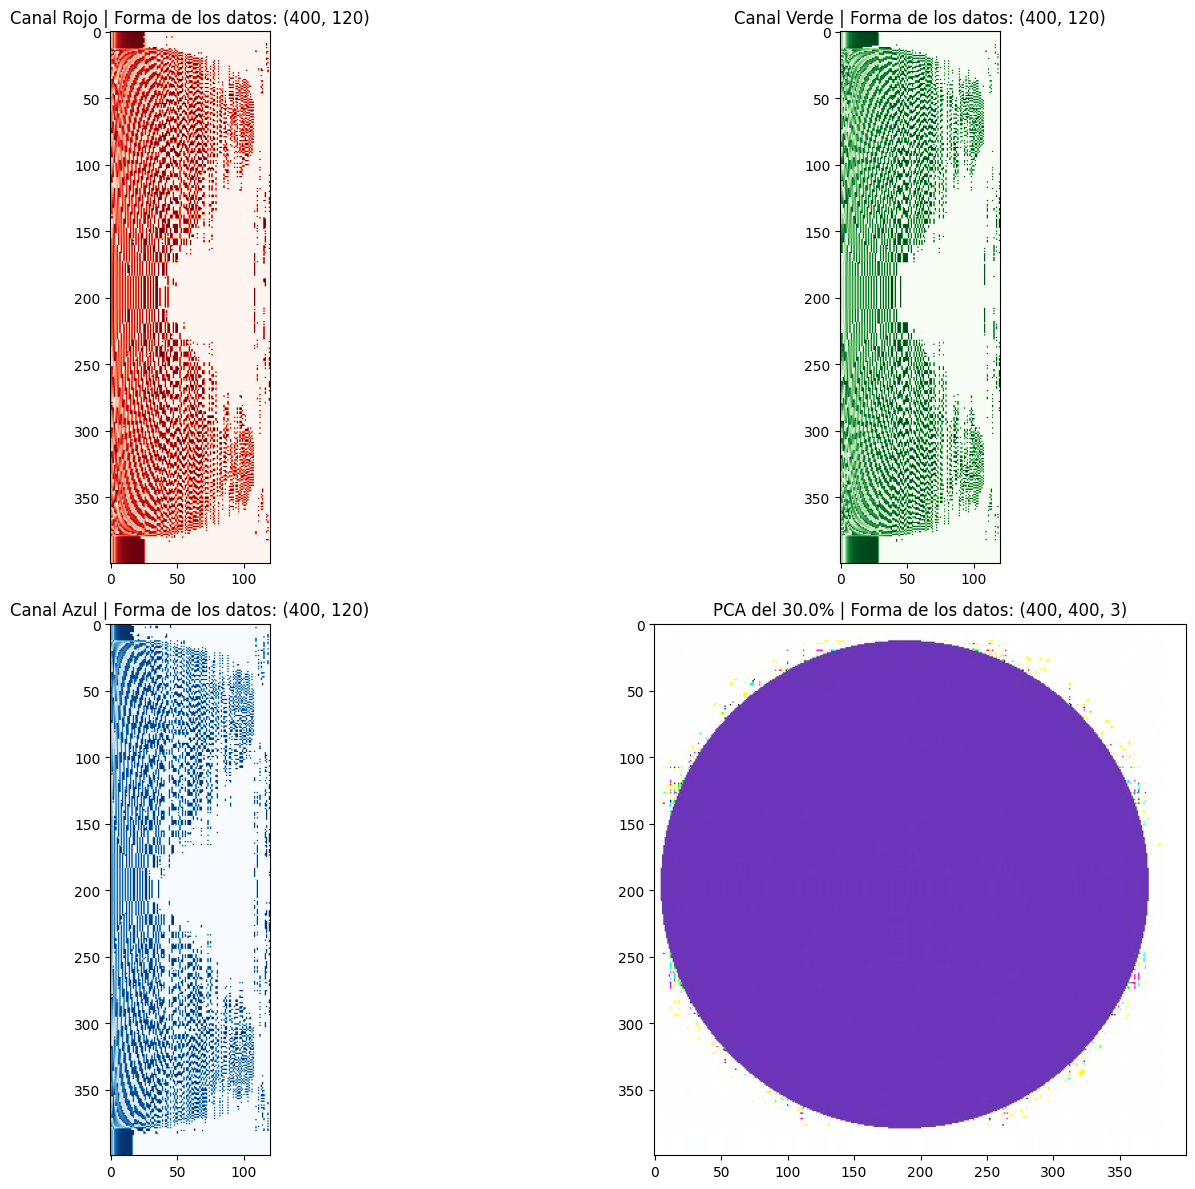

In [17]:

img3 = cv2.imread('/content/drive/MyDrive/UIS/SEMESTRE 7/INTELIGENCIA ARTIFICIAL/PROYECTO FINAL/Proyecto_Final_IA1_UIS/notebooks/figures/bola morada.jpg'  )


porcentaje = 30 # @param {type:"number"}


hola = graficarPCA_RGB( img3, porcentaje )





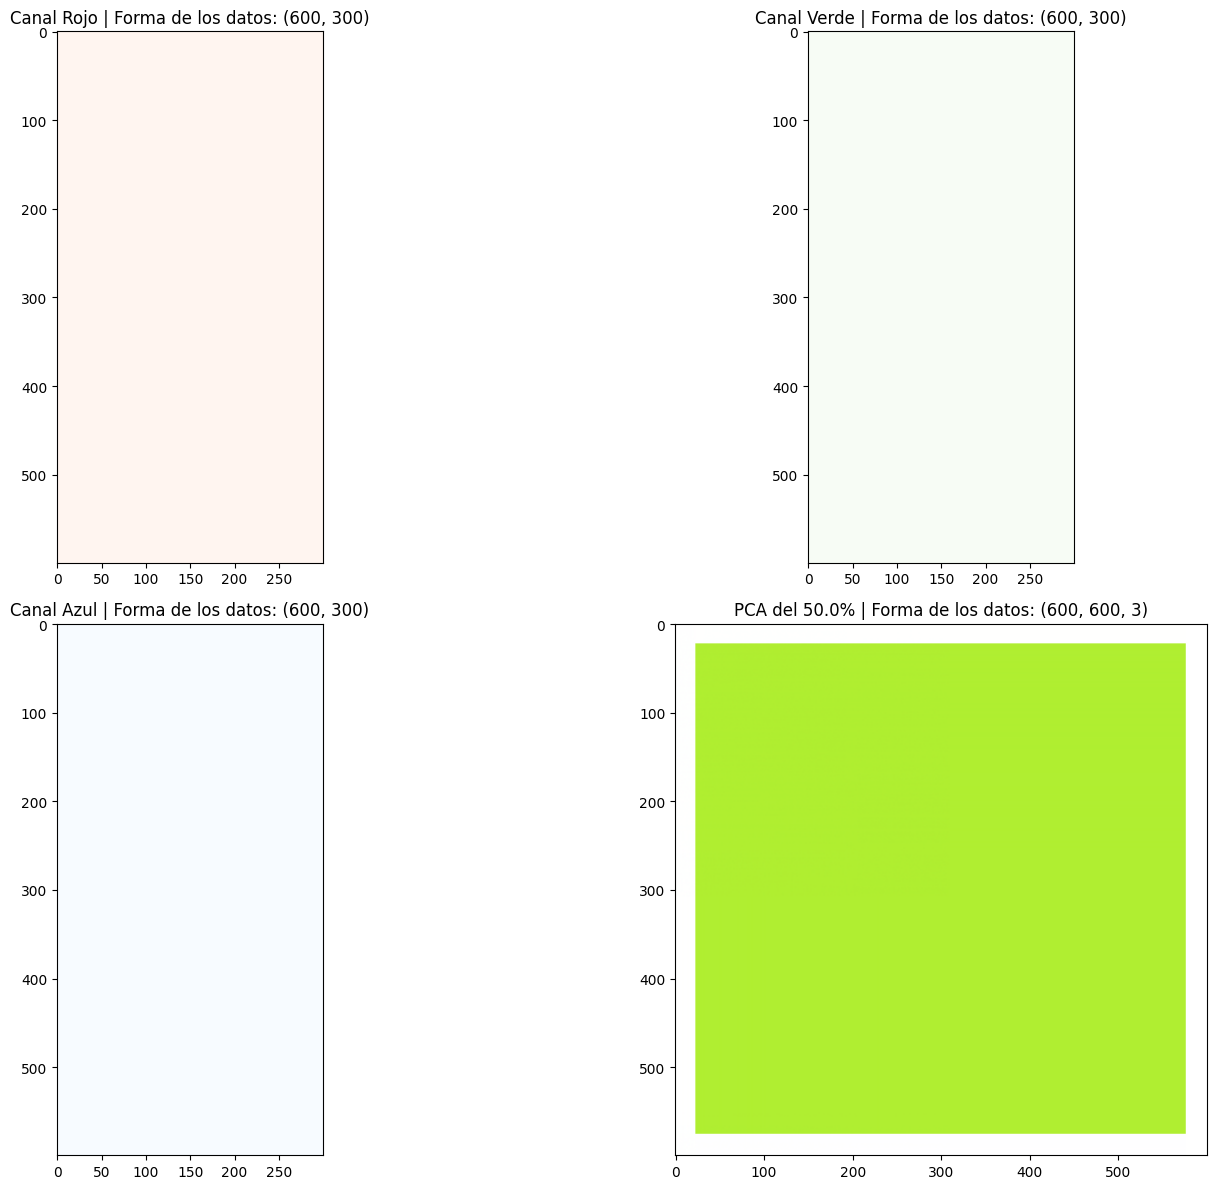

In [19]:
img4 = cv2.imread('/content/drive/MyDrive/UIS/SEMESTRE 7/INTELIGENCIA ARTIFICIAL/PROYECTO FINAL/Proyecto_Final_IA1_UIS/notebooks/figures/cuadrado verde.png' )



porcentaje = 50 # @param {type:"number"}



_ = graficarPCA_RGB( img4, porcentaje )


# <font color='#ff2800'> **Referencias** </font>

* Wikipedia contributors. (n.d.). Combinación lineal. Wikipedia, The Free Encyclopedia. https://es.wikipedia.org/w/index.php?title=Combinaci%C3%B3n_lineal&oldid=147461722

* PCA#. (n.d.). Scikit-Learn. Retrieved May 29, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

* Starmer, S. W. J. [@statquest]. (2018, April 2). StatQuest: Principal Component Analysis (PCA), step-by-step. Youtube. https://www.youtube.com/watch?v=FgakZw6K1QQ

* Dog, H. [@heisenbergsdog1630]. (2020, marzo 11). Principle component analysis: Visualized in 3D. Youtube. https://www.youtube.com/watch?v=De8HoMbis4k

* Wasnik, A. (2020, octubre 19). Principal Component Analysis for image data in python. AskPython. https://www.askpython.com/python/examples/principal-component-analysis-for-image-data

* Graficadora 3D. (n.d.). Geogebra.org. Retrieved June 2, 2024, from https://www.geogebra.org/3d

